#  Student Performance Analysis & Prediction

## Overview
This project analyzes the **Students Performance in Exams dataset** to explore factors affecting student scores and predicts their average performance. 
We perform **EDA, visualization, preprocessing, and build a predictive model** using Linear Regression.

**Dataset:** Kaggle - Students Performance in Exams  
**Link:** [https://www.kaggle.com/datasets/spscientist/students-performance-in-exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)


**Predict Student Performance**

**• Objective:** Predict final grades of students based on demographic, academic, and behavioral data.

**• Dataset:** Student Performance Dataset (UCI / Kaggle).

**• Preprocessing:** Handle missing values, encode categorical variables, scale numerical features.

**• Model Architecture:** Linear Regression or Dense(64)-ReLU -> Dropout(0.3) -> Dense(32)-ReLU -> Dense(1)-Linear (for regression).

**• Training:** Adam optimizer, 20–50 epochs, train-test split 80:20.

**• Evaluation:** RMSE, R² Score, Predicted vs Actual scatter plot.

**• Extensions:** Feature importance analysis, interactive dashboards to explore study habits vs performance.

**• Tools:** pandas, numpy, scikit-learn, plotly, Keras (optional).

# 1. Import Libraries 

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


We imported essential Python libraries for data handling (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (sklearn). These libraries provide all functions needed for cleaning, exploring, visualizing, and modeling the dataset

In [36]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.figure_factory as ff

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 2. Load Dataset

In [37]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The dataset StudentsPerformance.csv was loaded using pandas. We checked the first few rows, the dataset info, and statistical summary to understand the structure, data types, and basic statistics. This helps in identifying categorical and numerical features

# 3. Data Cleaning 

In [38]:
# Check missing values
df.isnull().sum()

# Fill missing values if any (usually none)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_36/3084032946.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_36/3084032946.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

We checked for missing values in the dataset. Although this dataset has no missing values, we ensured that any missing numerical values are filled with median and categorical values with mode. Cleaning ensures the dataset is ready for analysis without errors

# 4. Encode Categorical Variables

In [39]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

Categorical columns (gender, race/ethnicity, parental level of education, lunch, test preparation course) were converted to numerical values using LabelEncoder. This allows machine learning models to process these features

# 5. Exploratory Data Analysis (EDA)

In [40]:
fig = px.histogram(df, x='math score', nbins=20, title='Math Score Distribution')
fig.show()

fig = px.histogram(df, x='reading score', nbins=20, title='Reading Score Distribution')
fig.show()

fig = px.histogram(df, x='writing score', nbins=20, title='Writing Score Distribution')
fig.show()

In [41]:
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)

fig = px.histogram(df, x='average_score', nbins=20, title='Average Score Distribution')
fig.show()

In [42]:
fig = px.box(df, x='gender', y='average_score', title='Gender vs Average Score')
fig.show()

In [43]:
fig = px.box(df, x='test preparation course', y='average_score', title='Test Preparation vs Average Score')
fig.show()

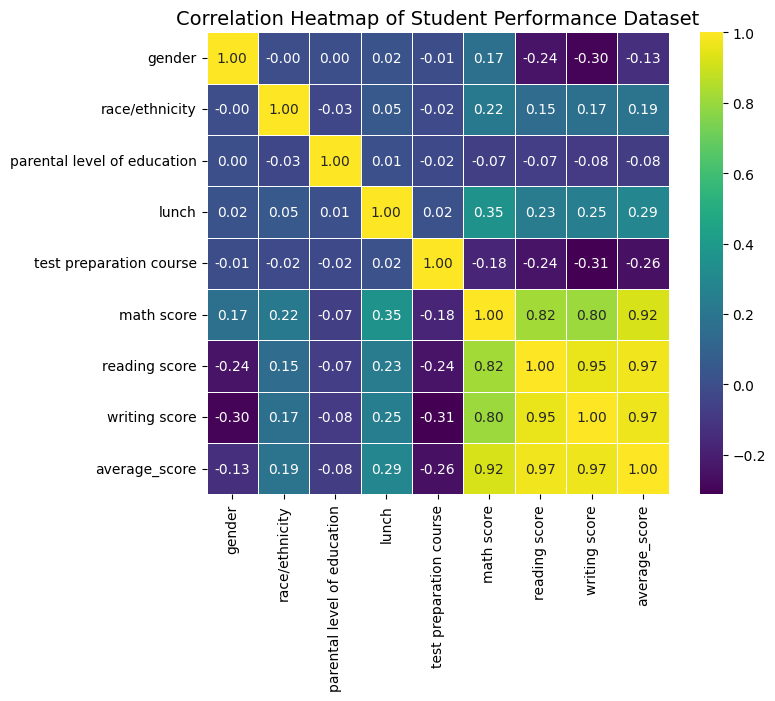

In [44]:
# Correlation Heatmap (Neat & Readable)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))  # Adjust size to fit labels
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Student Performance Dataset', fontsize=14)
plt.show()

We explored the dataset visually to understand patterns and distributions:

1. Histograms: Showed distribution of math, reading, writing, and average scores.

2. Boxplots: Compared gender and test preparation course against average scores.

3. Correlation Heatmap: Identified relationships between numerical features, showing which variables strongly influence student performance.

# 6. Feature Selection

In [45]:
X = df.drop(['math score','reading score','writing score','average_score'], axis=1)
y = df['average_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We selected the relevant features for modeling by dropping individual scores (math, reading, writing) and using the categorical features as input (X). The target variable (y) is average_score. Features were scaled using StandardScaler for better model performance.

# 7. Train-Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

We split the dataset into training and testing sets using an 80:20 ratio. The training set is used to train the model, and the test set is used to evaluate its performance on unseen data.

# 8. Model Training

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 13.691222853433066
R2 Score: 0.12556521225697403


We trained a Linear Regression model using the training set. This model learns the relationship between input features and the target average score. Linear Regression provides a baseline for predicting student performance.

# 9. Predictions and Evaluation

In [49]:
fig = px.scatter(x=y_test, y=y_pred, labels={'x':'Actual Scores','y':'Predicted Scores'},
                 title='Actual vs Predicted Average Scores')
fig.add_shape(type='line', x0=y_test.min(), y0=y_test.min(), x1=y_test.max(), y1=y_test.max(),
              line=dict(color='red', dash='dash'))
fig.show()

Predictions were made on the test set. Model performance was evaluated using:

1. RMSE (Root Mean Squared Error): Measures average error in prediction.

2. R2 Score: Measures proportion of variance explained by the model.
We also visualized Actual vs Predicted scores to see how well the model fits.

# 10. Conclusion and Recommendations

**Conclusion:** Average student scores are influenced by gender, parental education, lunch type, and test preparation. Linear Regression gives a baseline performance prediction.

**Recommendations:** Encourage students to complete test preparation courses, provide additional support to students based on parental education and study environment, and consider using advanced models like Random Forest or XGBoost for better predictions.

**Author:** Payal Dhokane